We are dealing with regression problem.

*Source of the dataset:* https://www.kaggle.com/neuromusic/avocado-prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data loading and first look at it

In [29]:
data = pd.read_csv('avocado.csv', index_col = 0)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Indexes are not unique so I have to reindex this DataFrame.

In [3]:
data.index = np.arange(1, len(data)+1)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
3,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
4,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
5,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18246,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18247,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18248,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Date is the object instead of datetime.

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.describe().round(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


We have columns about date and year. Let's add 2 columns - day of week and month, because maybe they will be more relevant than pure date for predicting the target variable.

In [7]:
data['dayofweek'] = pd.to_datetime(data['Date'])
data['dayofweek'] = data['dayofweek'].dt.weekday

data['month'] = pd.DatetimeIndex(data['Date']).month

data.describe().round(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,dayofweek,month
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.0,18249.00
mean,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15,6.0,6.18
std,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94,0.0,3.53
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00,6.0,1.00
25%,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00,6.0,3.00
50%,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00,6.0,6.00
75%,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00,6.0,9.00
max,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00,6.0,12.00


As we can see, every price has been measured on Saturday, so this new column 'dayofweek' has no sense - I will drop it.

In [8]:
data.drop('dayofweek', inplace = True, axis = 1)

We have 13 features. Here is the desciption of the relevant ones:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado (our label)
- type - conventional or organic
- year - the year of production
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold


## Exploratory Data Analysis

#### Handling missing values

In [9]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

There are no null values. This dataset seems to be cleared from missing values before.

#### Dealing with outliers

Because this dataset is cleared before, I can assume that outliers won't be in the columns about date, region and type.

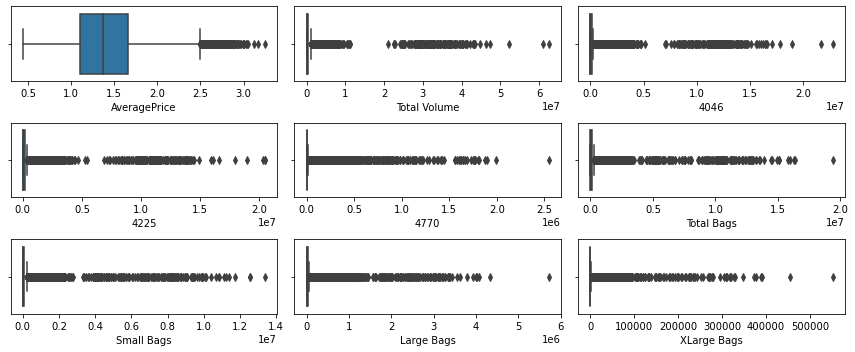

In [10]:
columns = data.columns.drop(['Date', 'month', 'type', 'region', 'year'])
plt.figure(figsize = (12, 5))
for name in columns:
    plt.subplot(3, 3, list(columns).index(name)+1)
    sns.boxplot(x = data[columns][name])
plt.tight_layout()
plt.show()

I'm gonna use IQR method to deal with outliers.

IQR tells us the variation in the dataset. Any value, which is beyond the range of Q3 + 1.5 *  IQR to  Q1 - 1.5 * IQR is treated as an outlier. Interquartile range is Q3 - Q1. Q1 represents the 25th percentile of the data and Q3 represents the 75th percentile of the data.

In [11]:
def is_outlier_iqr(dt):
    q1 = dt.quantile(.25)['AveragePrice']
    q3 = dt.quantile(.75)['AveragePrice']
    iqr = round(q3 - q1, 2)
    higher_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    df_out = dt.loc[(dt['AveragePrice'] > lower_boundary) & (dt['AveragePrice'] < higher_boundary)]
    return df_out

data_with = is_outlier_iqr(data)
data_with.describe().round(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
count,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00,18040.00
mean,1.39,860337.35,296377.10,298500.65,23104.00,242353.50,184269.98,54941.14,3142.38,2016.14,6.16
std,0.38,3472312.37,1271906.52,1210671.87,108056.60,991614.32,750237.75,245309.84,17791.92,0.94,3.54
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00,1.00
25%,1.09,11014.39,888.12,3017.74,0.00,5323.76,3006.91,137.69,0.00,2015.00,3.00
50%,1.36,111838.46,9114.65,30128.49,198.75,41373.42,27308.82,2747.00,0.00,2016.00,6.00
75%,1.65,439987.40,113482.67,153698.05,6401.72,112564.18,84584.04,22589.17,141.82,2017.00,9.00
max,2.49,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00,12.00


There were 209 samples marked as outliers.

#### Distributions of certain numerical features and target

Let's find out what is the distribution of the target variable, which is a continuous one, so I will use histogram to show this one.

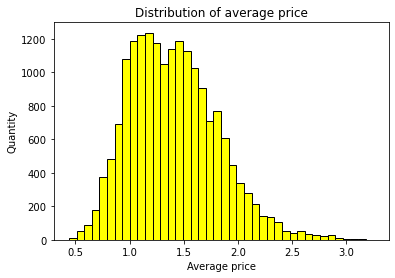

In [12]:
plt.hist(data['AveragePrice'], color = 'yellow', edgecolor = 'black', bins = 40)
plt.title("Distribution of average price")
plt.xlabel("Average price")
plt.ylabel("Quantity")
plt.show()

Now, let's focus on features.

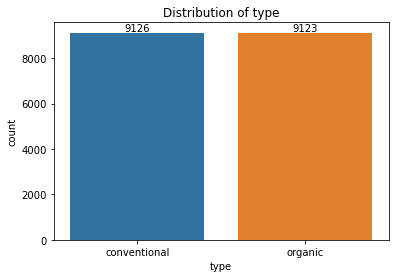

In [13]:
ax = sns.countplot(x = 'type', data = data)
ax.bar_label(ax.containers[0])
plt.title("Distribution of type")
plt.show()

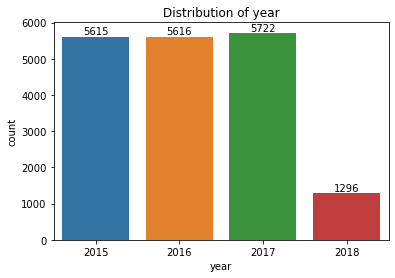

In [14]:
ax = sns.countplot(x = 'year', data = data)
ax.bar_label(ax.containers[0])
plt.title("Distribution of year")
plt.show()

In [15]:
data['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

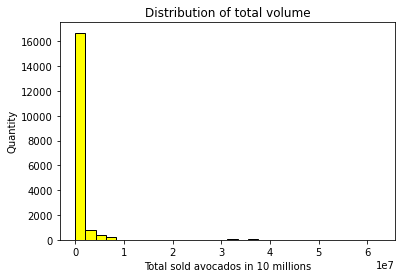

In [16]:
plt.hist(data['Total Volume'], color = 'yellow', edgecolor = 'black', bins = 30)
plt.title("Distribution of total volume")
plt.xlabel("Total sold avocados in 10 millions")
plt.ylabel("Quantity")
plt.show()

**Conclusions:**

- majority of average price is in interval [1.0; 1.75]
- type has almost the discrete uniform distribution
- there are just about the same number of examples from years 2015, 2016, 2017 and we have significantly less examples from year 2018
- region has the discrete uniform distribution
- nearly every example has total volume from the interval [0; 1 000 000]

#### Average price as a time series

In [17]:
data_timeseries = data.iloc[:, :2].set_index('Date')

In [18]:
data_timeseries = data_timeseries.groupby(data_timeseries.index).mean().round(2)
data_timeseries.head()

,AveragePrice
Date,
2015-01-04,1.30
2015-01-11,1.37
2015-01-18,1.39
2015-01-25,1.40
2015-02-01,1.25


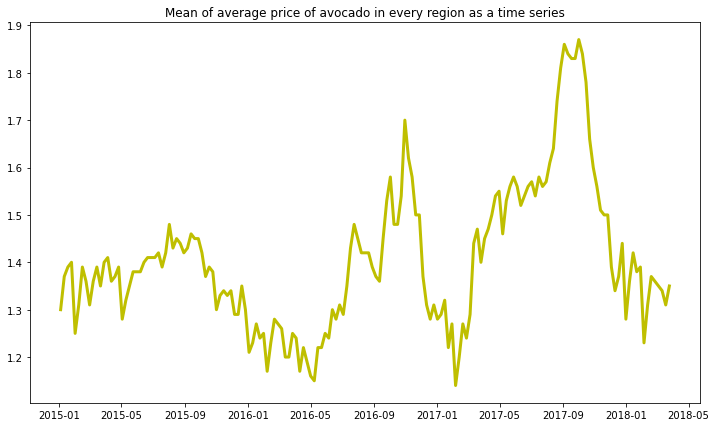

In [19]:
plt.figure(figsize = (12, 7), edgecolor = 'yellow')

plt.plot(data_timeseries, color = 'y', linewidth = 3)
plt.title("Mean of average price of avocado in every region as a time series")
plt.show()

#### Correlation matrix analysis with feature selection

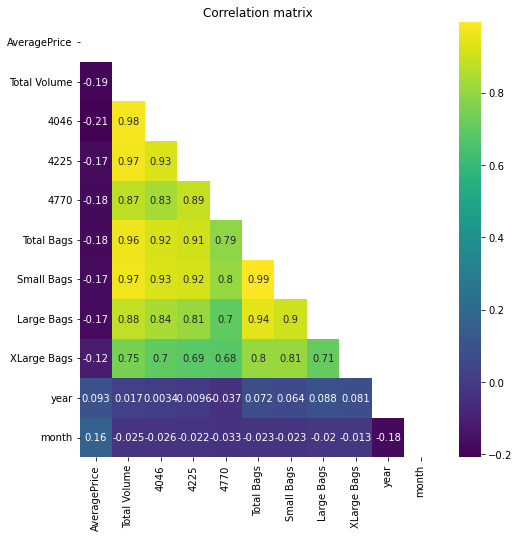

In [20]:
corr = data.corr()
f, ax = plt.subplots(figsize = (8, 8))
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, mask = mask, cmap = 'viridis')
ax.set_title('Correlation matrix')
plt.show()

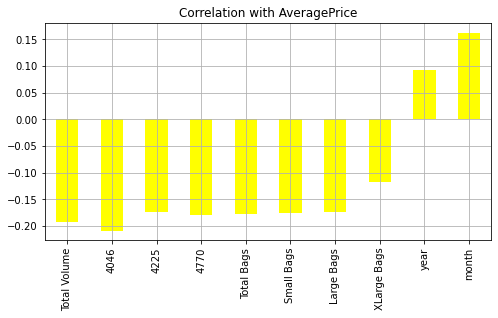

In [21]:
data.drop('AveragePrice', axis=1).corrwith(data['AveragePrice']).plot(kind = 'bar',
                                                       grid = True,
                                                       figsize = (8, 4),
                                                       title="Correlation with AveragePrice",
                                                       color = 'yellow')
plt.show()

**Conclusions:**

- year has negligible correlation with target, so I will drop it in the next step(*)
- the rest has significant, inverse correlation with Average Price

(*) I assume that significant correlation begins in .1 or -.1 correlation coefficient

In [22]:
data.drop(['year'], axis = 1, inplace = True)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month
1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,12
2,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,12
3,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,12
4,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,12
5,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,11


#### Splitting a dataset

In [23]:
y = data['AveragePrice']
X = data.drop(['AveragePrice'], axis = 1)

In [24]:
from sklearn.model_selection import train_test_split

#80(train)-10(valid)-10(test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.125, random_state = 42) #0.125 x 0.8 = 0.1

#### Dealing with categorical variables

In [25]:
cat_cols = data.columns.where(data.dtypes == 'object').dropna()
cat_cols

Index(['type', 'region'], dtype='object')

In [26]:
X_train

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month
1263,2015-09-20,559818.31,381034.21,76606.11,58.29,102119.70,47692.12,54427.58,0.00,conventional,MiamiFtLauderdale,9
3493,2016-10-30,193940.78,75576.83,41553.71,4805.57,72004.67,70936.81,1058.93,8.93,conventional,Detroit,10
9511,2015-08-09,4920.30,374.39,2116.41,1410.55,1018.95,1018.95,0.00,0.00,organic,Charlotte,8
10642,2015-11-08,54182.70,6009.03,16101.87,111.18,31960.62,30428.94,1531.68,0.00,organic,Northeast,11
11018,2015-08-16,30519.41,4315.77,19426.12,0.00,6777.52,0.00,6777.52,0.00,organic,Portland,8
...,...,...,...,...,...,...,...,...,...,...,...,...
6669,2017-02-19,179250.21,12336.44,74485.41,1362.80,91065.56,42818.68,48242.38,4.50,conventional,Indianapolis,2
11874,2015-03-01,218957.86,110458.55,81474.98,311.88,26712.45,12552.61,14159.84,0.00,organic,West,3
9397,2015-10-18,3334.38,14.26,159.32,0.00,3160.80,3160.80,0.00,0.00,organic,BuffaloRochester,10
12803,2016-04-10,6966.00,93.75,191.64,11.15,6669.46,5468.47,1200.99,0.00,organic,HarrisburgScranton,4


'type' has only 2 possible values, so we can use OneHotEncoder fot his feature. For 'region' the better solution will be Ordinal Encoding, because this feature can be unambiguously represented as integer for every example and it has too many possible values for OneHotEncoding.

For the safety reasons I will create a copy of dataset. because I will irretrievably transform values of these two features.

In [27]:
data_copy = data.copy()

In [28]:
# One Hot Encoding
X_train = pd.concat([X_train, pd.get_dummies(X_train['type'])], axis = 1)
X_val = pd.concat([X_val, pd.get_dummies(X_val['type'])], axis = 1)
X_test = pd.concat([X_test, pd.get_dummies(X_test['type'])], axis = 1)

# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype = np.intc)
X_train['region'] = ord_enc.fit_transform(X_train['region'].values.reshape(-1, 1))
X_val['region'] = ord_enc.transform(X_val['region'].values.reshape(-1, 1))
X_test['region'] = ord_enc.transform(X_test['region'].values.reshape(-1, 1))

X_train.head()

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,conventional,organic
1263,2015-09-20,559818.31,381034.21,76606.11,58.29,102119.70,47692.12,54427.58,0.00,conventional,24,9,1,0
3493,2016-10-30,193940.78,75576.83,41553.71,4805.57,72004.67,70936.81,1058.93,8.93,conventional,13,10,1,0
9511,2015-08-09,4920.30,374.39,2116.41,1410.55,1018.95,1018.95,0.00,0.00,organic,7,8,0,1
10642,2015-11-08,54182.70,6009.03,16101.87,111.18,31960.62,30428.94,1531.68,0.00,organic,29,11,0,1
11018,2015-08-16,30519.41,4315.77,19426.12,0.00,6777.52,0.00,6777.52,0.00,organic,36,8,0,1
